## DTSC 2302 Spring 2025 Homework #2

Turn in your assignment via Gradescope

Due 3/29/25, 11: 59pm

For this assignment, you may *not* use generative AI and you may only use python commands and code we used in class. 




### Question 1.
With the breast cancer dataset, use the features Texture, Radius, Area, Compactness, Symmetry and Smoothness, run 8 fold cross validation for the following models: logistic regression, SVM with linear kernel, SVM with RBF kernel, decision tree with depth of 3, decision tree with depth of 5.  Report the accuracy for each methodology. Interpret the model that performed the best including suggesting which features were most useful for prediction.

### Question 2.

For this question, we are going to predict whether or not an individual gave blood.  This information is in the feature 'Class' from the following dataset.
[<https://webpages.charlotte.edu/mschuck1/classes/DTSC2301/Data/blood_transfusion.csv>].

The other features in these data are:

    _Recency_: the time in months since the last time a person intended to give blood;

    _Frequency_: the number of time a person intended to give blood in the past;

    _Monetary_: the amount of blood given in the past (in cm³);

    _Time_: the time in months since the first time a person intended to give blood.

Using all of the features here,  run 10 fold cross validation for the following models: logistic regression, LDA, QDA, SVM with linear kernel, and decision tree with depth of 3.  Report the accuracy for each methodology. Interpret the model that performed the best including suggesting which features were most useful for prediction and explaining the cross validation performance.

### Question 3.

Below is sample code for a function to plot decision boundaries for a classifier using two features.  

Using that code, plot the decisions boundaries based upon training data for a logistic regression, a QDA and an SVM with radial kernel classifier for the breast cancer data with Texture and Compactness as predictors.  Split the breast cancer data into 75% training and 25% test data and use the random_state = 4242.

In [ ]:
# Create a function to plot the decision boundary
# Notice that this code Prof. Schuckers got from OpenAI and some folks were having trouble
#            making it work.
# So now there is newer code below
# OpenAI. (2025). ChatGPT (Mar 22 version) [Large language model]. https://openai.com/
def plot_decision_boundary(X, y, model, ax):
    # Define the grid over the feature space
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict on all points in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the contour and the training points
    ax.contourf(xx, yy, Z, alpha=0.75)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50, cmap=plt.cm.RdYlBu)
    ax.set_title("Decision Boundary")

# Create a plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the decision boundary for the classifier
plot_decision_boundary(X_train, y_train, model, ax)

# Show the plot
plt.show()

In [21]:
# Choose the features X and target y
X=bcancer[['Texture','Compactness']]
y = bcancer['Diagnosis']
y2=(y=="M").astype(int)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)


QuadraticDiscriminantAnalysis()

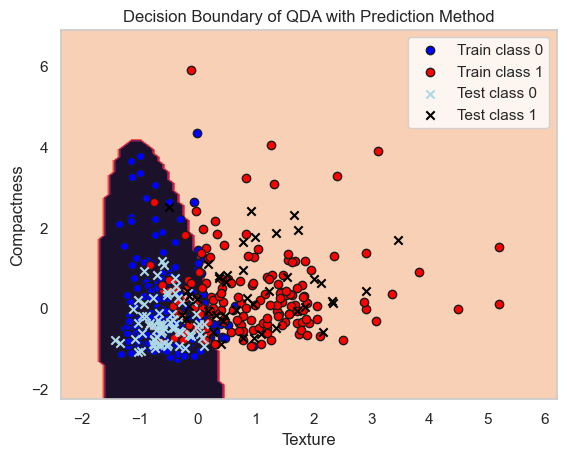

In [24]:
from sklearn.inspection import DecisionBoundaryDisplay

db = DecisionBoundaryDisplay.from_estimator(
    clf,
    X_train,
    response_method="predict"
)

# Plot training and test points with different colors for each class
scatter_train_0 = plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], 
                              c='blue', edgecolors='k', marker='o', label='Train class 0')
scatter_train_1 = plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], 
                              c='red', edgecolors='k', marker='o', label='Train class 1')
scatter_test_0 = plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], 
                             c='lightblue', marker='x', label='Test class 0')
scatter_test_1 = plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], 
                             c='black', marker='x', label='Test class 1')

# Add legend
plt.legend()

plt.xlabel("Texture")
plt.ylabel("Compactness")
plt.title("Decision Boundary of QDA with Prediction Method")
plt.show()